In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [102]:
data = pd.read_csv('credit_card.csv')
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [103]:
data.isnull().sum()

ID           0
LIMIT_BAL    0
SEX          0
EDUCATION    0
MARRIAGE     0
AGE          0
PAY_1        0
PAY_2        0
PAY_3        0
PAY_4        0
PAY_5        0
PAY_6        0
BILL_AMT1    0
BILL_AMT2    0
BILL_AMT3    0
BILL_AMT4    0
BILL_AMT5    0
BILL_AMT6    0
PAY_AMT1     0
PAY_AMT2     0
PAY_AMT3     0
PAY_AMT4     0
PAY_AMT5     0
PAY_AMT6     0
DEFAULT      0
dtype: int64

In [104]:
data['PAY_1'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_1, dtype: int64

In [105]:
data['PAY_2'].value_counts()

 0    15730
-1     6050
 2     3927
-2     3782
 3      326
 4       99
 1       28
 5       25
 7       20
 6       12
 8        1
Name: PAY_2, dtype: int64

In [106]:
data['PAY_3'].value_counts()

 0    15764
-1     5938
-2     4085
 2     3819
 3      240
 4       76
 7       27
 6       23
 5       21
 1        4
 8        3
Name: PAY_3, dtype: int64

In [107]:
data['PAY_4'].value_counts()

 0    16455
-1     5687
-2     4348
 2     3159
 3      180
 4       69
 7       58
 5       35
 6        5
 8        2
 1        2
Name: PAY_4, dtype: int64

In [108]:
data['PAY_5'].value_counts()

 0    16947
-1     5539
-2     4546
 2     2626
 3      178
 4       84
 7       58
 5       17
 6        4
 8        1
Name: PAY_5, dtype: int64

In [109]:
data['PAY_6'].value_counts()

 0    16286
-1     5740
-2     4895
 2     2766
 3      184
 4       49
 7       46
 6       19
 5       13
 8        2
Name: PAY_6, dtype: int64

In [110]:
data['DEFAULT'].value_counts()

0    23364
1     6636
Name: DEFAULT, dtype: int64

In [111]:
# Percentage of 1 is more than 20% therefore it is a balanced data. 
6636/(6636+23364)

0.2212

In [112]:
data.SEX.unique()

array([2, 1], dtype=int64)

In [113]:
data['SEX'].replace({2:'Female',1:'Male'},inplace=True)

In [114]:
data.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [115]:
data.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

In [116]:
data.groupby(['DEFAULT','EDUCATION'])['EDUCATION'].count()

DEFAULT  EDUCATION
0        0               14
         1             8549
         2            10700
         3             3680
         4              116
         5              262
         6               43
1        1             2036
         2             3330
         3             1237
         4                7
         5               18
         6                8
Name: EDUCATION, dtype: int64

In [117]:
data.groupby(['DEFAULT','MARRIAGE'])['MARRIAGE'].count()

DEFAULT  MARRIAGE
0        0              49
         1           10453
         2           12623
         3             239
1        0               5
         1            3206
         2            3341
         3              84
Name: MARRIAGE, dtype: int64

# Classifying 0,5,6 to 4 as the problem statement doesn't mention anything about the categories 0,5,6 so we will merge it to category others i.e. 4

In [118]:
data['EDUCATION'].replace({0:4,5:4,6:4},inplace=True)
data['EDUCATION'].replace({1:'Graduate School',2:'University',3:'High School',4:'Others'},inplace=True)

# Classifying 0 to 3 as the problem statement doesn't mention anything about the category 0 so we will merge it to category others i.e. 3.

In [119]:
data['MARRIAGE'].replace(0,3,inplace=True)
data['MARRIAGE'].replace({1:'Married',2:'Single',3:'Others'},inplace=True)

# Outlier Treatment:

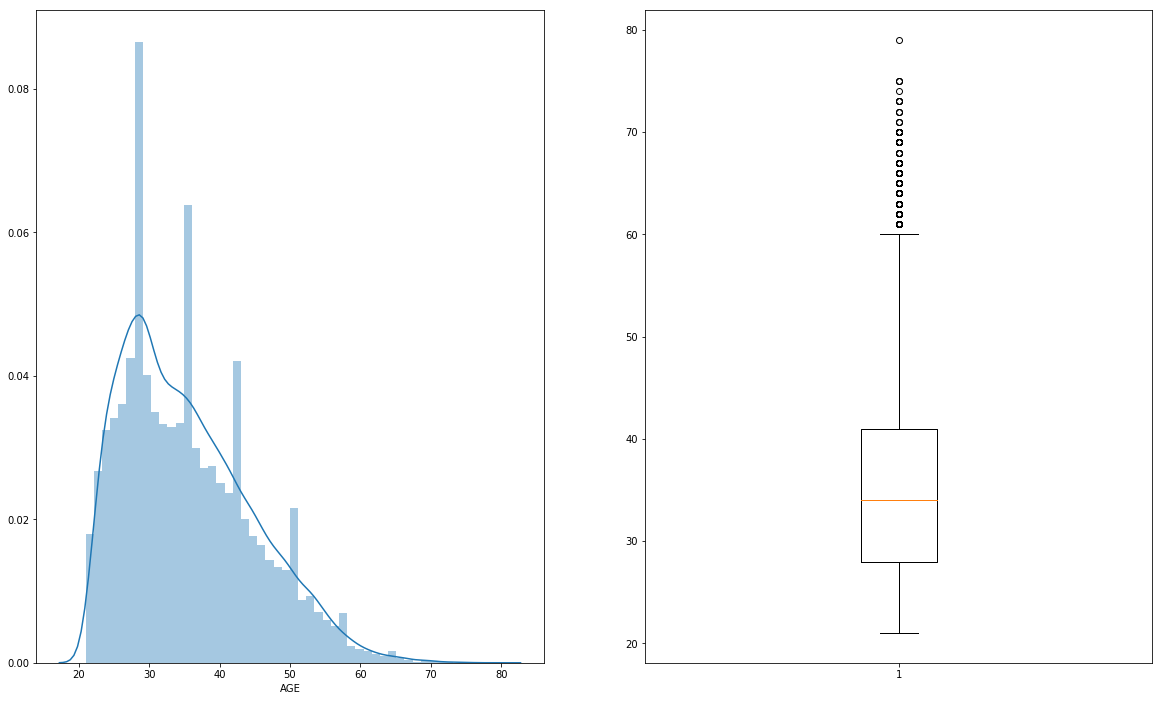

In [120]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
sns.distplot(data['AGE'])
plt.subplot(1,2,2)
plt.boxplot(data['AGE'])
plt.show()

In [121]:
q3=np.percentile(data['AGE'],75)
q1=np.percentile(data['AGE'],25)
IQR=q3-q1
ul=q3+(1.5*IQR)
ul

60.5

In [122]:
data[data['AGE']>ul]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
102,103,480000,Male,Graduate School,Married,63,0,0,0,2,...,487066,471145,469961,16078,55693,17000,0,18000,24200,0
246,247,250000,Female,University,Married,75,0,-1,-1,-1,...,1010,5572,794,1631,1536,1010,5572,794,1184,0
366,367,50000,Female,University,Married,61,0,0,0,0,...,23319,23171,24774,3000,2237,975,1000,2000,1039,0
387,388,80000,Male,High School,Married,73,-1,0,0,2,...,70646,72870,75018,3500,4330,3500,3500,3500,5100,1
1029,1030,30000,Female,University,Married,67,2,2,0,0,...,29499,30124,26855,0,1500,2182,1200,0,2302,1
1058,1059,80000,Female,High School,Married,67,0,0,0,0,...,29236,10662,2408,6000,5002,10662,2,2408,11662,0
1070,1071,230000,Male,Graduate School,Married,61,-1,-1,-1,-1,...,4932,2783,7411,3710,2266,7338,2791,7433,4527,0
1073,1074,360000,Male,Others,Married,66,-1,-1,-1,-1,...,151858,48580,1451,75351,4064,152618,48822,1451,171944,0
1171,1172,80000,Male,High School,Married,62,-1,-1,-1,-1,...,672,5112,3932,1642,1975,672,5112,3932,20289,0
1194,1195,100000,Female,High School,Married,66,0,0,0,0,...,97141,97143,97532,4702,4617,3600,3865,3850,3705,0


### As the age in the outliers are valid age to have a credit card, therfore we will not treat the outliers.

# Univariate Analysis

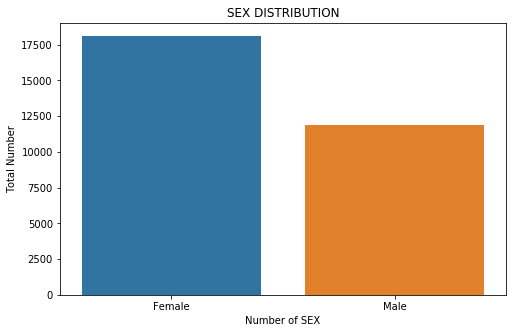

In [123]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="SEX", data=data)
plt.title('SEX DISTRIBUTION')
plt.xlabel('Number of SEX')
plt.ylabel('Total Number')
plt.show()




In [124]:
m=data[data['SEX']=='Male']
print('The Male percentage who applied for credit card:',round(m['DEFAULT'].count()/data['DEFAULT'].count(),4)*100)

The Male percentage who applied for credit card: 39.629999999999995


In [125]:
f=data[data['SEX']=='Female']
print('The Female percentage who applied for credit card:',round(f['DEFAULT'].count()/data['DEFAULT'].count(),4)*100)

The Female percentage who applied for credit card: 60.370000000000005


### Majority of credit card holder are females.

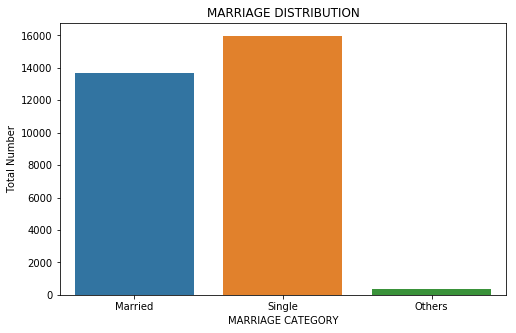

In [126]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="MARRIAGE", data=data)
plt.title('MARRIAGE DISTRIBUTION')
plt.xlabel('MARRIAGE CATEGORY')
plt.ylabel('Total Number')
plt.show()



In [127]:
data['MARRIAGE'].value_counts()

Single     15964
Married    13659
Others       377
Name: MARRIAGE, dtype: int64

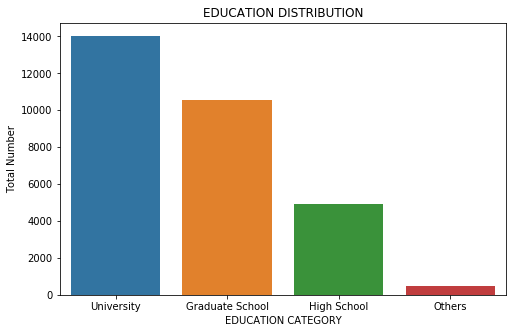

In [128]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x="EDUCATION", data=data)
plt.title('EDUCATION DISTRIBUTION')
plt.xlabel('EDUCATION CATEGORY')
plt.ylabel('Total Number')
plt.show()


In [129]:
data['EDUCATION'].value_counts()

University         14030
Graduate School    10585
High School         4917
Others               468
Name: EDUCATION, dtype: int64

### Majority of credit card holder have education degree of University.

### Limit Balance Distribution:

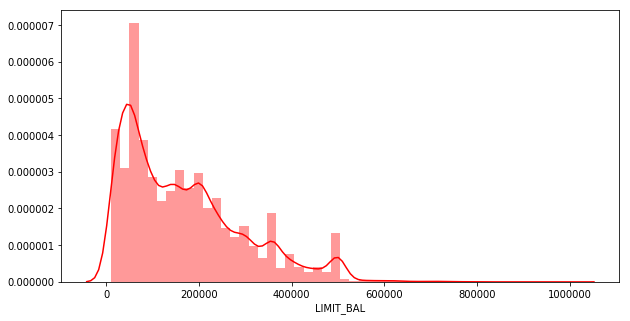

In [130]:
plt.figure(figsize = (10,5))
sns.distplot(data['LIMIT_BAL'],kde=True,color='red')
plt.show()

### Very few customer have the limit balance more than 200000.

# Past Payment Distribution:

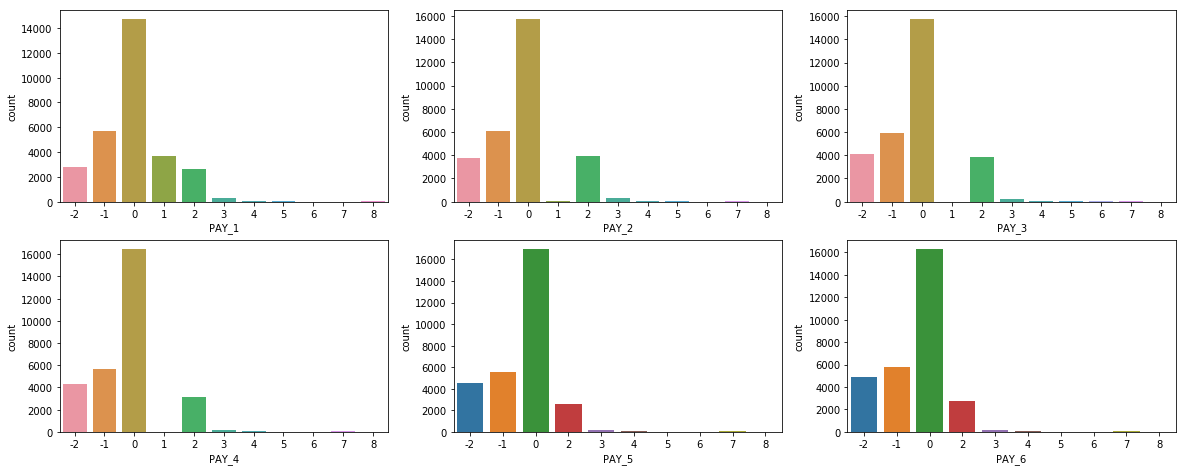

In [131]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.countplot(data['PAY_1'])
plt.subplot(3,3,2)
sns.countplot(data['PAY_2'])
plt.subplot(3,3,3)
sns.countplot(data['PAY_3'])
plt.subplot(3,3,4)
sns.countplot(data['PAY_4'])
plt.subplot(3,3,5)
sns.countplot(data['PAY_5'])
plt.subplot(3,3,6)
sns.countplot(data['PAY_6'])
plt.show()

#### Value after 0 are more prone to be defaulter.

# Bill Statement Distribution:

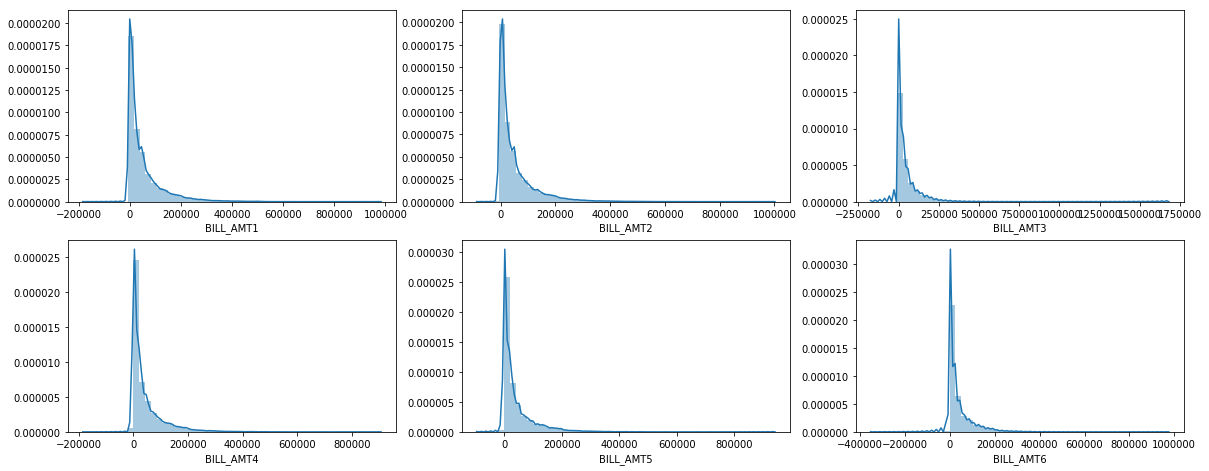

In [132]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.distplot(data['BILL_AMT1'])
plt.subplot(3,3,2)
sns.distplot(data['BILL_AMT2'])
plt.subplot(3,3,3)
sns.distplot(data['BILL_AMT3'])
plt.subplot(3,3,4)
sns.distplot(data['BILL_AMT4'])
plt.subplot(3,3,5)
sns.distplot(data['BILL_AMT5'])
plt.subplot(3,3,6)
sns.distplot(data['BILL_AMT6'])
plt.show()

# Previous Payment Disribution:

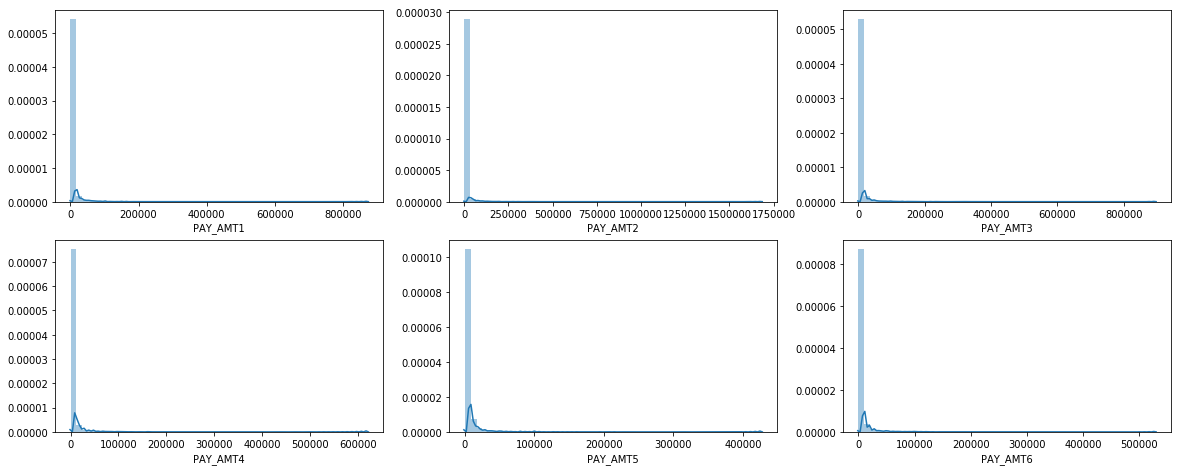

In [133]:
plt.figure(figsize=(20,12))
plt.subplot(3,3,1)
sns.distplot(data['PAY_AMT1'])
plt.subplot(3,3,2)
sns.distplot(data['PAY_AMT2'])
plt.subplot(3,3,3)
sns.distplot(data['PAY_AMT3'])
plt.subplot(3,3,4)
sns.distplot(data['PAY_AMT4'])
plt.subplot(3,3,5)
sns.distplot(data['PAY_AMT5'])
plt.subplot(3,3,6)
sns.distplot(data['PAY_AMT6'])
plt.show()

# Bivariate Analysis:

### SEX & DEFAULT


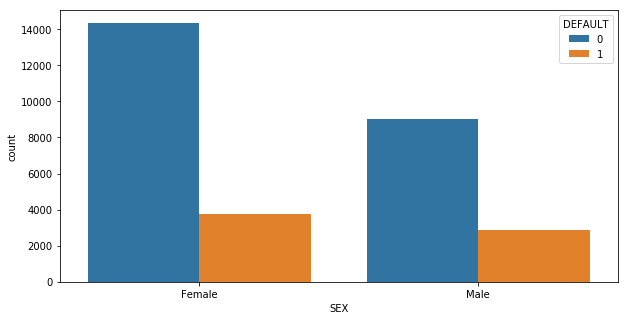

In [134]:
plt.figure(figsize = (10,5))
sns.countplot(data['SEX'],hue=data['DEFAULT'])
plt.show()

In [135]:
a=data[data['SEX']=='Male']
print('The Defaulter percentage of male in male population is:',round(a['DEFAULT'].sum()/a['DEFAULT'].count(),4)*100)

The Defaulter percentage of male in male population is: 24.169999999999998


In [136]:
b=data[data['SEX']=='Female']
print('The Defaulter percentage of female in female population is:',round(b['DEFAULT'].sum()/b['DEFAULT'].count(),4)*100)

The Defaulter percentage of female in female population is: 20.78


# MARRIAGE & DEFAULT:

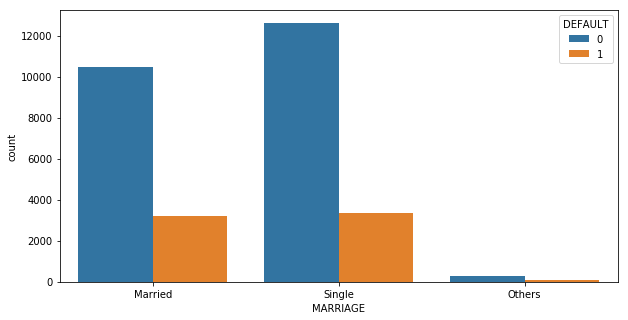

In [137]:
plt.figure(figsize = (10,5))
sns.countplot(data['MARRIAGE'], hue = data['DEFAULT'])
plt.show()

# EDUCATION & DEFAULT:

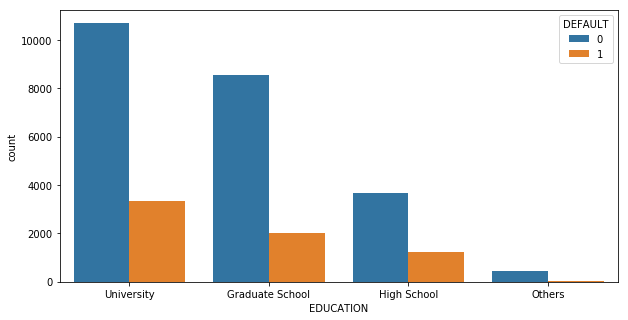

In [138]:
plt.figure(figsize = (10,5))
sns.countplot(data['EDUCATION'], hue = data['DEFAULT'])
plt.show()

In [139]:
u=data[data['EDUCATION']=='University']
g=data[data['EDUCATION']=='Graduate School']
h=data[data['EDUCATION']=='High School']

In [140]:
print('The Defaulter percentage of customer having university degree in their own population is:',round(u['DEFAULT'].sum()/u['DEFAULT'].count(),4)*100)
print('The Defaulter percentage of customer having graduate degree in their own population is:',round(g['DEFAULT'].sum()/g['DEFAULT'].count(),4)*100)
print('The Defaulter percentage of customer having high school degree in their own population is:',round(h['DEFAULT'].sum()/h['DEFAULT'].count(),4)*100)

The Defaulter percentage of customer having university degree in their own population is: 23.73
The Defaulter percentage of customer having graduate degree in their own population is: 19.23
The Defaulter percentage of customer having high school degree in their own population is: 25.16


### Customers having high school degree are more in defaulters.

In [141]:
ug=0
hs=0
gs=0
for i in data['EDUCATION']:
    if i=='University':
        ug=ug+1
    elif i=='Graduate School':
        gs=gs+1
    elif i=='High School':
        hs=hs+1
        
print('University=',ug/data['EDUCATION'].count()*100)
print('Graduate School=',gs/data['EDUCATION'].count()*100)
print('High School=',hs/data['EDUCATION'].count()*100)

University= 46.766666666666666
Graduate School= 35.28333333333333
High School= 16.39


### Customers having university degree majorly applied for the credit cards.

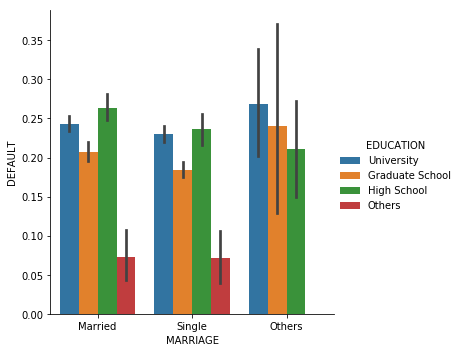

In [145]:
sns.catplot(x="MARRIAGE", y="DEFAULT", hue="EDUCATION", kind="bar", data=data)
plt.show()

# FEATURE ENGINEERING:

### Each Month Pending Amount:

In [42]:
data['PENDING_AMT1'] = data['BILL_AMT1']-data['PAY_AMT1']
data['PENDING_AMT2'] = data['BILL_AMT2']-data['PAY_AMT2']
data['PENDING_AMT3'] = data['BILL_AMT3']-data['PAY_AMT3']
data['PENDING_AMT4'] = data['BILL_AMT4']-data['PAY_AMT4']
data['PENDING_AMT5'] = data['BILL_AMT5']-data['PAY_AMT5']
data['PENDING_AMT6'] = data['BILL_AMT6']-data['PAY_AMT6']

In [43]:
data.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT,PENDING_AMT1,PENDING_AMT2,PENDING_AMT3,PENDING_AMT4,PENDING_AMT5,PENDING_AMT6
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,1,3913,2413,689,0,0,0
1,2,120000,Female,University,Single,26,-1,2,0,0,...,1000,0,2000,1,2682,725,1682,2272,3455,1261
2,3,90000,Female,University,Single,34,0,0,0,0,...,1000,1000,5000,0,27721,12527,12559,13331,13948,10549
3,4,50000,Female,University,Married,37,0,0,0,0,...,1100,1069,1000,0,44990,46214,48091,27214,27890,28547
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,9000,689,679,0,6617,-31011,25835,11940,18457,18452


### Customer value:

In [44]:
total_payment_amt = (data['PAY_AMT1'] + data['PAY_AMT2'] + data['PAY_AMT3'] + data['PAY_AMT4'] +data['PAY_AMT5']  + data['PAY_AMT6'])/6

In [45]:
total_bill_amt = (data['BILL_AMT1'] + data['BILL_AMT2'] + data['BILL_AMT3'] + data['BILL_AMT4'] +data['BILL_AMT5']  + data['BILL_AMT6'])

In [46]:
data['customer value'] = total_payment_amt/total_bill_amt

In [47]:
data.isnull().sum()

ID                  0
LIMIT_BAL           0
SEX                 0
EDUCATION           0
MARRIAGE            0
AGE                 0
PAY_1               0
PAY_2               0
PAY_3               0
PAY_4               0
PAY_5               0
PAY_6               0
BILL_AMT1           0
BILL_AMT2           0
BILL_AMT3           0
BILL_AMT4           0
BILL_AMT5           0
BILL_AMT6           0
PAY_AMT1            0
PAY_AMT2            0
PAY_AMT3            0
PAY_AMT4            0
PAY_AMT5            0
PAY_AMT6            0
DEFAULT             0
PENDING_AMT1        0
PENDING_AMT2        0
PENDING_AMT3        0
PENDING_AMT4        0
PENDING_AMT5        0
PENDING_AMT6        0
customer value    795
dtype: int64

In [48]:
data[np.isinf(data['customer value']) == True].T

,294,301,604,1157,2634,2742,2819,2859,3025,3141,...,25552,25675,26041,26279,27725,27872,28235,29114,29157,29531
ID,295,302,605,1158,2635,2743,2820,2860,3026,3142,...,25553,25676,26042,26280,27726,27873,28236,29115,29158,29532
LIMIT_BAL,130000,440000,180000,470000,200000,220000,240000,190000,20000,80000,...,390000,200000,200000,200000,110000,80000,100000,300000,360000,240000
SEX,Male,Female,Female,Male,Female,Female,Female,Female,Male,Female,...,Female,Female,Female,Female,Female,Female,Female,Female,Female,Male
EDUCATION,Graduate School,Graduate School,University,High School,Graduate School,Graduate School,Graduate School,University,University,University,...,High School,University,Graduate School,University,University,University,Graduate School,High School,High School,Graduate School
MARRIAGE,Single,Single,Single,Married,Married,Married,Married,Single,Married,Single,...,Single,Single,Single,Married,Single,Single,Married,Married,Married,Married
AGE,29,36,31,39,42,40,38,28,45,24,...,43,46,34,35,22,26,37,50,56,34
PAY_1,1,-2,1,1,-2,-2,1,1,-2,-2,...,1,-2,1,1,-2,1,1,-2,1,1
PAY_2,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
PAY_3,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2
PAY_4,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2,...,-2,-2,-2,-2,-2,-2,-2,-2,-2,-2


In [49]:
data.replace([np.inf, -np.inf], np.nan,inplace = True)

In [50]:
data.isnull().sum()

ID                  0
LIMIT_BAL           0
SEX                 0
EDUCATION           0
MARRIAGE            0
AGE                 0
PAY_1               0
PAY_2               0
PAY_3               0
PAY_4               0
PAY_5               0
PAY_6               0
BILL_AMT1           0
BILL_AMT2           0
BILL_AMT3           0
BILL_AMT4           0
BILL_AMT5           0
BILL_AMT6           0
PAY_AMT1            0
PAY_AMT2            0
PAY_AMT3            0
PAY_AMT4            0
PAY_AMT5            0
PAY_AMT6            0
DEFAULT             0
PENDING_AMT1        0
PENDING_AMT2        0
PENDING_AMT3        0
PENDING_AMT4        0
PENDING_AMT5        0
PENDING_AMT6        0
customer value    870
dtype: int64

In [51]:
data.fillna("1",inplace = True)

#### When we find out the customer value (i.e. ratio of total payment to the total bill amount), there were some nan & inf values. nan values comes when there is the scenario of 0/0 while inf values comes when there is finitevalue/0 so in both the cases bill amount genrated is 0 so customer has either did the extra payment or he is not dong at all as there is no bill generated therefore, both the customer are valuable customer therefore we replace them by 1.

In [52]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'DEFAULT',
       'PENDING_AMT1', 'PENDING_AMT2', 'PENDING_AMT3', 'PENDING_AMT4',
       'PENDING_AMT5', 'PENDING_AMT6', 'customer value'],
      dtype='object')

In [53]:
data_copy = data

In [54]:
data_copy.drop(columns = ['BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'], inplace = True)

In [55]:
data_copy['customer value'] = data_copy['customer value'].astype('float')

In [56]:
data_copy = pd.get_dummies(data_copy)

In [57]:
data_copy.drop(columns = ['ID'], inplace = True)

# Data Preparation and Model Building

In [58]:
# Importing test_train_split from sklearn library
from sklearn.model_selection import train_test_split

In [59]:
# Putting feature variable to X
X = data_copy.drop('DEFAULT',axis=1)

# Putting response variable to y
y = data_copy['DEFAULT']

# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Logistic Regression:

In [61]:
import statsmodels.api as sm
#Build Logit Model
logit = sm.Logit(y,X)

# fit the model
model_logistic = logit.fit()

# Prining Logistic Regression model results 
model_logistic.summary2()

Optimization terminated successfully.
         Current function value: 0.466780
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
=========================================================================
Model:                  Logit              Pseudo R-squared:   0.117     
Dependent Variable:     DEFAULT            AIC:                28050.7862
Date:                   2019-11-10 13:38   BIC:                28233.5832
No. Observations:       30000              Log-Likelihood:     -14003.   
Df Model:               21                 LL-Null:            -15853.   
Df Residuals:           29978              LLR p-value:        0.0000    
Converged:              1.0000             Scale:              1.0000    
No. Iterations:         7.0000                                           
-------------------------------------------------------------------------
                           Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------------
LIMIT_BAL                 -0.0000   0.0000 -8.3046 0.0000 -0.0000 -0.0000
AGE                        0.0061   0.0019  3.2839 0.0010  0.0025  0.0097
PAY_1                      0.6003   0.0177 33.8928 0.0000  0.5655  0.6350
PAY_2                      0.0890   0.0201  4.4271 0.0000  0.0496  0.1284
PAY_3                      0.0735   0.0224  3.2845 0.0010  0.0296  0.1173
PAY_4                      0.0218   0.0248  0.8773 0.3803 -0.0268  0.0703
PAY_5                      0.0360   0.0268  1.3442 0.1789 -0.0165  0.0884
PAY_6                      0.0048   0.0221  0.2189 0.8267 -0.0385  0.0481
PENDING_AMT1              -0.0000   0.0000 -2.1238 0.0337 -0.0000 -0.0000
PENDING_AMT2               0.0000   0.0000  0.1238 0.9015 -0.0000  0.0000
PENDING_AMT3              -0.0000   0.0000 -1.8088 0.0705 -0.0000  0.0000
PENDING_AMT4              -0.0000   0.0000 -0.3406 0.7334 -0.0000  0.0000
PENDING_AMT5              -0.0000   0.0000 -0.1056 0.9159 -0.0000  0.0000
PENDING_AMT6               0.0000   0.0000  0.2423 0.8086 -0.0000  0.0000
customer value             0.0197   0.0135  1.4564 0.1453 -0.0068  0.0463
SEX_Female                 7.6452      nan     nan    nan     nan     nan
SEX_Male                   7.7470      nan     nan    nan     nan     nan
EDUCATION_Graduate School -8.4517      nan     nan    nan     nan     nan
EDUCATION_High School     -8.5760      nan     nan    nan     nan     nan
EDUCATION_Others          -9.6586      nan     nan    nan     nan     nan
EDUCATION_University      -8.5385      nan     nan    nan     nan     nan
MARRIAGE_Married          -0.3553      nan     nan    nan     nan     nan
MARRIAGE_Others           -0.5750      nan     nan    nan     nan     nan
MARRIAGE_Single           -0.5498      nan     nan    nan     nan     nan
=========================================================================

"""

In [62]:
#Fitting logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [64]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_logistic = confusion_matrix(y_test, y_pred)
print(cm_logistic)

[[6901  159]
 [1499  441]]


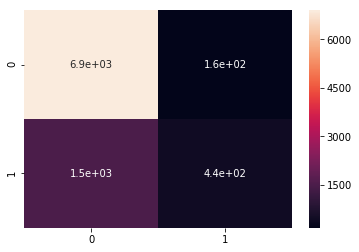

In [65]:
sns.heatmap(cm_logistic,annot=True)
plt.show()

In [66]:
from sklearn.metrics import classification_report 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      7060
           1       0.73      0.23      0.35      1940

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.78      0.60      0.62      9000
weighted avg       0.80      0.82      0.78      9000



In [67]:
from sklearn import metrics
print('Accuracy score is:',metrics.accuracy_score(y_test, y_pred))

Accuracy score is: 0.8157777777777778


In [68]:
y_pred_proba =classifier.predict_proba(X_test)
y_pred_proba

array([[0.4954257 , 0.5045743 ],
       [0.75820234, 0.24179766],
       [0.713519  , 0.286481  ],
       ...,
       [0.76690036, 0.23309964],
       [0.93766453, 0.06233547],
       [0.88855655, 0.11144345]])

In [69]:
probs = y_pred_proba[:,1]

In [70]:
from sklearn.metrics import roc_auc_score, roc_curve
auc = roc_auc_score(y_test, probs)
print('AUC: %.2f' %auc)

AUC: 0.72


In [71]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,probs)
print(fpr)
print(tpr)
print(thresholds)

[0.00000000e+00 1.41643059e-04 1.41643059e-04 ... 9.99433428e-01
 1.00000000e+00 1.00000000e+00]
[0.         0.         0.00360825 ... 0.99948454 0.99948454 1.        ]
[1.99999998e+00 9.99999980e-01 9.05743496e-01 ... 8.34488735e-03
 3.56419843e-05 3.28928482e-07]


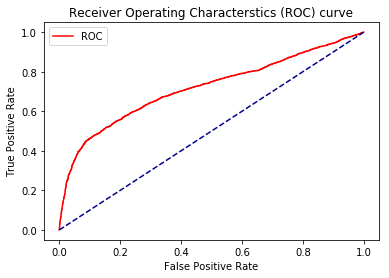

In [72]:
plt.plot(fpr,tpr, color = 'red', label = 'ROC')
plt.plot([0,1],[0,1], color =  'darkblue', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characterstics (ROC) curve')
plt.legend()
plt.show()

## Grid Search CV:

In [73]:
##Grid search cross validation
from sklearn.model_selection import GridSearchCV
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg_cv=GridSearchCV(classifier,grid,cv=10)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)


tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2'}
accuracy : 0.8070952380952381


# KNN:

In [74]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
prediction = knn.predict(X_test)
print('Prediction: {}'.format(prediction))

Prediction: [0 0 0 ... 0 0 0]


In [75]:
print('With KNN accuracy is: ',knn.score(X_test,y_test)) # accuracy

With KNN accuracy is:  0.7907777777777778


In [76]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_knn= confusion_matrix(y_test, prediction)
print(cm_knn)

[[6477  583]
 [1300  640]]


In [77]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      7060
           1       0.52      0.33      0.40      1940

   micro avg       0.79      0.79      0.79      9000
   macro avg       0.68      0.62      0.64      9000
weighted avg       0.77      0.79      0.77      9000



### Model Complexity:

In [85]:
neigh = np.arange(1,25)
train_accuracy = []
test_accuracy = []
for i in neigh:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

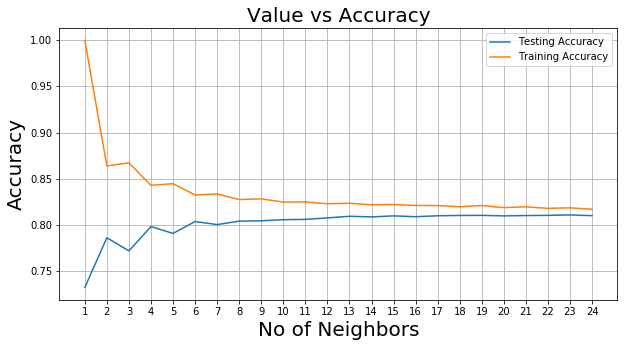

Best accuracy is 0.8107777777777778 with k = 23


In [86]:
plt.figure(figsize = [10,5])
plt.plot(neigh, test_accuracy, label = 'Testing Accuracy')
plt.plot(neigh,train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value vs Accuracy', fontsize = 20)
plt.xlabel('No of Neighbors',fontsize = 20)
plt.ylabel('Accuracy',fontsize = 20)
plt.xticks(neigh)
plt.grid()
plt.show()
print('Best accuracy is {} with k = {}'.format(np.max(test_accuracy), 1 + test_accuracy.index(np.max(test_accuracy))))

### Hyperparameter Tuning:

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
grid = {'n_neighbors': np.arange(1,25)}
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn_cv = GridSearchCV(knn, grid, cv=3) # GridSearchCV
knn_cv.fit(X_train, y_train)

print('The accuracy of the knn classifier is {:.2f} out of 1 on training data'.format(knn_cv.score(X_train, y_train)))
print('The accuracy of the knn classifier is {:.2f} out of 1 on test data'.format(knn_cv.score(X_test, y_test)))
print("Tuned hyperparameter k: {}".format(knn_cv.best_params_)) 
print("Best score: {}".format(knn_cv.best_score_))

The accuracy of the knn classifier is 0.82 out of 1 on training data
The accuracy of the knn classifier is 0.81 out of 1 on test data
Tuned hyperparameter k: {'n_neighbors': 17}
Best score: 0.8080952380952381


## Random Forest:

#### Default Hyperparameters
Let's first fit a random forest model with default hyperparameters.

In [78]:
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier()

In [79]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
# Making predictions
predictions = rfc.predict(X_test)

In [81]:
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score

In [82]:
# Let's check the report of our default model
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.94      0.88      7060
           1       0.60      0.31      0.41      1940

   micro avg       0.81      0.81      0.81      9000
   macro avg       0.72      0.63      0.65      9000
weighted avg       0.78      0.81      0.78      9000



In [83]:
# Printing confusion matrix
print(confusion_matrix(y_test,predictions))

[[6666  394]
 [1342  598]]


In [84]:
print(accuracy_score(y_test,predictions))

0.8071111111111111


## Hyper Parameter Tuning:

In [88]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [89]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 216 out of 216 | elapsed: 18.1min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_depth': [4, 8, 10], 'min_samples_leaf': range(100, 400, 200), 'min_samples_split': range(200, 500, 200), 'n_estimators': [100, 200, 300], 'max_features': [5, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [90]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8191428571428572 using {'max_depth': 4, 'max_features': 10, 'min_samples_leaf': 300, 'min_samples_split': 200, 'n_estimators': 100}


### Fitting the final model with the best parameters obtained from grid search.

In [91]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=4,
                             min_samples_leaf=300, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=100)

In [92]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=4, max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=300, min_samples_split=200,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [93]:
# predict
predictions = rfc.predict(X_test)

In [94]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7060
           1       0.67      0.36      0.47      1940

   micro avg       0.82      0.82      0.82      9000
   macro avg       0.76      0.66      0.68      9000
weighted avg       0.81      0.82      0.80      9000



In [95]:
print(confusion_matrix(y_test,predictions))

[[6712  348]
 [1234  706]]


In [96]:
print('Accuracy Score  is:',accuracy_score(y_test,predictions))

Accuracy Score  is: 0.8242222222222222


# 11. Output

### Accuracy scores with Default Values:

In [97]:
Accuracy_Score_default = pd.DataFrame({'Models':['Logistic','KNN','Random Forest'],'Accuracy score':[81.57,79.07,80.71]})

In [99]:
print('The Accuracy Scores with Default Values are:')
Accuracy_Score_default

The Accuracy Scores with Default Values are:


,Models,Accuracy score
0,Logistic,81.57
1,KNN,79.07
2,Random Forest,80.71


### Accuracy Scores with Hyperparameter Tunning:

In [100]:
Accuracy_Score_tunned = pd.DataFrame({'Models':['Logistic','KNN','Random Forest'],'Accuracy score':[80.7,81.07,82.42]})

In [101]:
print('The Accuracy Scores after HyperParameter Tunning are:')
Accuracy_Score_tunned

The Accuracy Scores after HyperParameter Tunning are:


,Models,Accuracy score
0,Logistic,80.70
1,KNN,81.07
2,Random Forest,82.42


# Inference:

#### 1. There were no Null values in the dataset.
#### 2. There were some outliers in the Age feature, but they can be kept untreated as those were valid age to be the credit card holder.
#### 3. We did some unvariate and bivariate analysis to know which category of people holding education degree as well as marriage are most prone to hold the credit card, as well as prone to hold the be dafaulter.
#### 4. We derived new features using the given features and droped those features.
#### 5. After the completion of EDA we splited the data and did scaling using standard scaler.
#### 6. We fitted the scaled data with 3 classificaton models. i.e.:Logistic,KNN and Random Forest.
#### 7. when we fit the model with Default parametrs , We found that Logistic gave us good accuracy, presion and Recall.
#### 8. when we fit the model tunning the hyper parametrs , We found that Random Forest gave us good accuracy, presion and Recall.


#### -------------------------------------------------------------------------THANK    YOU -------------------------------------------------------------------------------------------